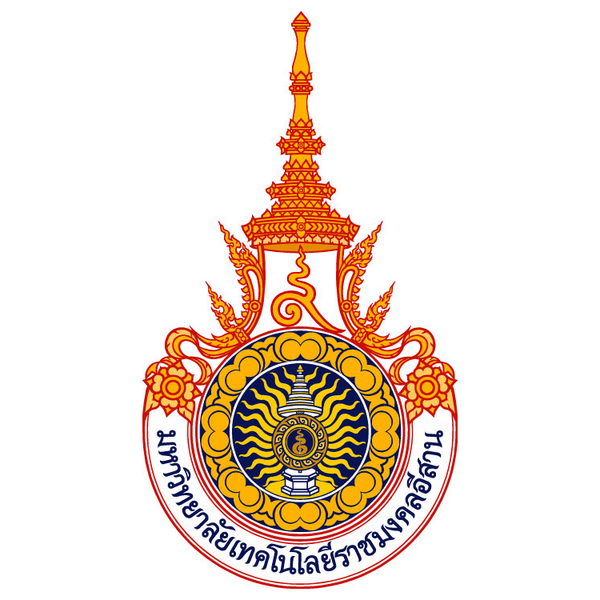
- อาจารย์พัฒนศักดิ์ ชัยพรรณา
- สาขาวิชาวิศวกรรรมโยธา
- คณะอุตสาหกรรมและเทคโนโลยี
- มหาวิทยาลัยเทคโนโลยีราชมงคลอีสาน วิทยาเขตสกลนคร

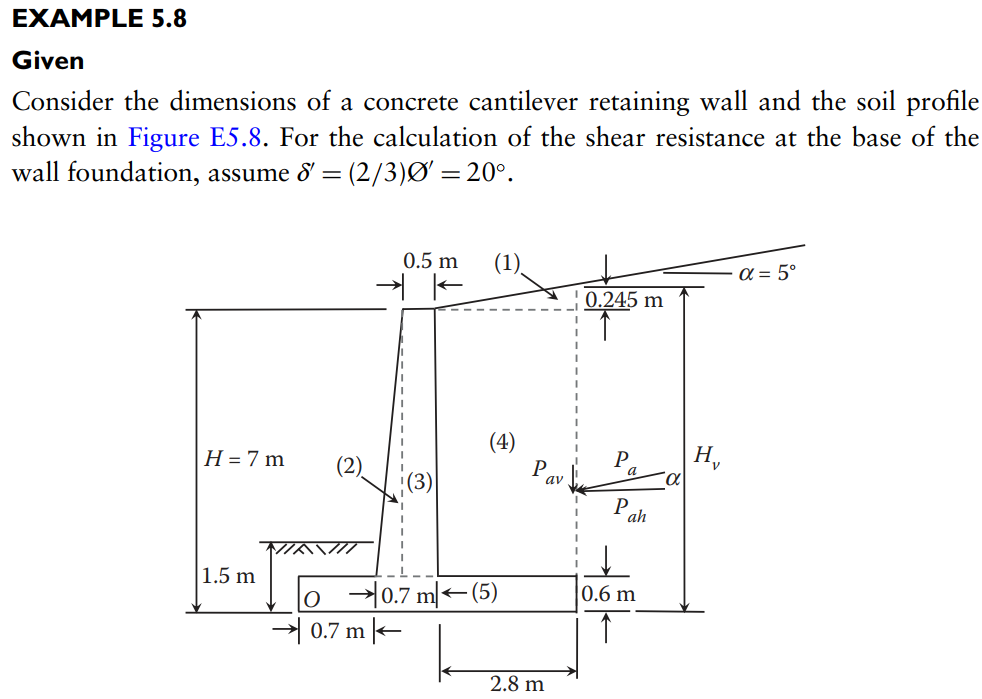

# Import Libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(legacy='1.25')
pi = math.pi

# Soil parameter

In [2]:
# soil friction angle
ang = 30*pi/180

# unit weight (kN/m^3)
r = 19

# inclination
a = 5*pi/180

# Wall Geometry

In [3]:
hb = 7
hf = 1.5
b1 = 0.7
b2 = 0.7
b3 = 2.8
b = b1 + b2 +b3
stem = 0.5
thick = 0.6

In [4]:
# additional height
hv = b3*math.sin(a)
hv

0.24403607969344285

# Lateral coefficient

In [5]:
def coeff(cosa, cosp):
    Ka = round(cosa*(cosa-math.sqrt(cosa**2-cosp**2))/(cosa+math.sqrt(cosa**2-cosp**2)),3)
    Kp = round(cosa*(cosa+math.sqrt(cosa**2-cosp**2))/(cosa-math.sqrt(cosa**2-cosp**2)),3)
    #print(Ka, Kp)
    return Ka, Kp

In [6]:
cosa = math.cos(a)
cosp = math.cos(ang)
Ka, Kp = coeff(cosa, cosp)
print(Ka, Kp)

0.337 2.943


# Active Force

In [7]:
Pa = 0.5*r*(hb+hv)**2*Ka
Pah = Pa*math.cos(a)
Pav = Pa*math.sin(a)

print(Pa, Pah, Pav)

168.00210200456695 167.3628032852182 14.642347983375863


# Passive Force

In [8]:
Pp = 0.5*r*hf**2*Kp
print(Pp)

62.906625


# Area

In [9]:
a1 = 0.5*b3**2*math.cos(a)*math.sin(a)
a2 = 0.5*(hb-thick)*(b2-stem)
a3 =(hb-thick)*stem
a4 = (hb-thick)*b3
a5 = thick*(b1+b2+b3)

In [10]:
area = [a1, a2, a3, a4, a5]
area = np.array(area)
area

array([ 0.34035043,  0.64      ,  3.2       , 17.92      ,  2.52      ])

# Weight

In [11]:
unit = [19, 24, 24, 19, 24]
unit = np.array(unit)
unit

array([19, 24, 24, 19, 24])

In [12]:
weight = area*unit
weight

array([  6.46665814,  15.36      ,  76.8       , 340.48      ,
        60.48      ])

# Moment arm

In [13]:
arm1 = 2*b3/3+b1+b2
arm2 = 2*(b2-stem)/3+b1
arm3 = b1+b2-stem/2
arm4 = b1 + b2 + b3/2
arm5 = (b1 + b2 + b3)/2
arm = [arm1, arm2, arm3, arm4, arm5]
arem = np.array(arm)
arm

[3.2666666666666666, 0.8333333333333333, 1.15, 2.8, 2.0999999999999996]

In [14]:
moment = weight*arm
moment

array([ 21.12441658,  12.8       ,  88.32      , 953.344     ,
       127.008     ])

In [15]:
sum_load = np.sum(weight)
sum_moment = np.sum(moment)
print(sum_load, sum_moment)

499.5866581363165 1202.5964165786338


In [16]:
# Total Vertical Load
RB = sum_load+Pav
RB

514.2290061196924

In [17]:
FR = (RB)*math.tan(2*ang/3)
FR = FR.astype(float)
FR

187.16405182386083

In [18]:
MR = sum_moment + Pav*(b1+b2+b3)
MR

1264.0942781088124

In [19]:
M0 = (hb+hv)*Pah/3
M0

404.1273951322523

# Overturning Safety Factor

In [20]:
FS_overturning = MR/M0
FS_overturning

3.1279598793225403

# Sliding Safety Factor

In [21]:
FS_sliding = (FR+Pp)/Pah
FS_sliding

1.494183127404317

# Bearing Capacity Safety Factor

In [22]:
e = b/2 - (MR-M0)/RB
e

0.427657769705053

In [23]:
if e<b/6:
    print("e < b/6")
else:
    pirnt("e > b/6")

e < b/6


In [24]:
q_max = RB*(1+6*e/b)/b
q_min = RB*(1-6*e/b)/b
print(q_max, q_min)

197.23616808114915 47.6347872139425


In [25]:
F_qs = F_rs = 1

In [26]:
q = r*hf
q

28.5

In [27]:
b_ef = b - 2*e
b_ef

3.3446844605898933

In [28]:
F_qd = 1+2*math.tan(ang)*(1-math.sin(ang))**2*(hf/b)
F_qd

1.1030982623552903

In [29]:
F_rd = 1
alpha=math.atan(Pah/RB)
alpha

0.31465111662616807

In [30]:
alpha*180/pi

18.028181001758078

In [31]:
F_qi = (1 - 2*alpha/pi)**2
F_qi

0.639499102458728

In [32]:
F_ri = (1 - alpha/ang)**2
F_ri

0.15924938902962912

In [33]:
Nq = (math.tan(pi/4 + ang/2))**2*(math.exp(pi*math.tan(ang)))
Nq

18.401122218708668

In [34]:
Nr = 2*(Nq + 1)*math.tan(ang)
Nr

22.402486271104557

In [35]:
qu = q*Nq+F_qs*F_qd*F_qi+0.5*r*b_ef*Nr*F_rs*F_rd*F_ri
qu

638.4955643047426

In [36]:
FS_bearing = qu/q_max
FS_bearing

3.237213390000791